01. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [22]:
# import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
orders_products_merged_customers = pd.read_pickle(r'C:\Users\alexg\InstacartBasketAnalysis\02Data\PreparedData\orders_products_merged_customers.pkl')

In [26]:
df_products_wrangled = pd.read_csv(r'C:\Users\alexg\InstacartBasketAnalysis\02Data\PreparedData\products_wrangled.csv', index_col =False)

In [3]:
orders_products_merged_customers = orders_products_merged_customers[:10000000]

In [27]:
df_products_wrangled 

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [65]:
result = []

for value in orders_products_merged_customers['department']:
 if value in ('frozen'):
    result.append('yes')
    elif value in ('alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'household', 'international', 'meat seafood', 'missing', 'other', 'pantry', 'personal care', 'pets', 'produce','snacks'):
        result.append('no')

SyntaxError: invalid syntax (1014125889.py, line 6)

In [66]:
result = []

for value in orders_products_merged_customers['department']:
  if value in ('frozen'):
    result.append('yes')
  elif value in ('alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'household', 'international', 'meat seafood', 'missing', 'other', 'pantry', 'personal care', 'pets', 'produce','snacks'):
    result.append('no')

In [67]:
orders_products_merged_customers['frozen_food_status'] = result

In [69]:
orders_products_merged_customers['frozen_food_status'].value_counts(dropna = False)

no    907
Name: frozen_food_status, dtype: int64

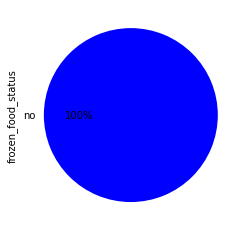

In [70]:
frozen_food_pie = orders_products_merged_customers['frozen_food_status'].value_counts().plot.pie(autopct=('%1.f%%'), colors = ['blue', 'green'])

In [31]:
orders_products_merged_customers.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'Unnamed: 0', 'first_name', 'last_name',
       'gender', 'state', 'age', 'date_joined', 'dependants', 'marital_status',
       'income', 'region', 'max_order', 'loyalty_flag', 'big_spender_flag',
       'active_customers_flag', 'age_group_flag', 'income_flag',
       'dependants_flag', 'meal_prepper_flag', 'department'],
      dtype='object')

In [29]:
orders_products_merged_customers = orders_products_merged_customers.merge(df_products_wrangled, on = 'Unnamed: 0')

In [84]:
orders_products_merged_customers

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,big_spender_flag,active_customers_flag,age_group_flag,income_flag,dependants_flag,meal_prepper_flag,department,frequency_flag,frozen_food_status,Product_level_flag
0,44,203487,115,7,203487,2460383,516,69,0,11,...,High spender,high-activity customers,Senior,High,no dependents,Meal,breakfast,Non-frequent customer,no,Top_level
1,141,203487,107,19,203487,3286665,516,12,3,14,...,High spender,high-activity customers,Senior,High,no dependents,Not,breakfast,Non-frequent customer,no,Top_level
2,141,203487,107,19,203487,812717,516,19,4,16,...,High spender,high-activity customers,Senior,High,no dependents,Not,breakfast,Non-frequent customer,no,Top_level
3,141,203487,107,19,203487,1873796,516,22,4,14,...,High spender,high-activity customers,Senior,High,no dependents,Not,breakfast,Non-frequent customer,no,Top_level
4,141,203487,107,19,203487,491718,516,23,0,9,...,High spender,high-activity customers,Senior,High,no dependents,Meal,breakfast,Non-frequent customer,no,Top_level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,130,206076,37,1,206076,1193140,168851,2,3,14,...,High spender,low-activity customers,Adult,Mid,1 to 2 dependents,Not,beverages,Non-frequent customer,no,Top_level
903,130,206076,37,1,206076,1870356,168851,3,1,8,...,High spender,low-activity customers,Adult,Mid,1 to 2 dependents,Meal,beverages,Non-frequent customer,no,Top_level
904,196,206076,77,7,206076,1903574,168851,1,2,8,...,High spender,low-activity customers,Adult,Mid,1 to 2 dependents,Not,beverages,Non-frequent customer,no,Top_level
905,196,206076,77,7,206076,1193140,168851,2,3,14,...,High spender,low-activity customers,Adult,Mid,1 to 2 dependents,Not,beverages,Non-frequent customer,no,Top_level


In [85]:
orders_products_merged_customers['department'].value_counts()

breakfast    900
beverages      7
Name: department, dtype: int64

In [86]:
orders_products_merged_customers['product_name'].value_counts()

203487    900
206076      7
Name: product_name, dtype: int64

In [87]:
orders_products_merged_customers['product_name'] = orders_products_merged_customers.groupby(['max_order'])['prices'].transform(np.max)

In [88]:
orders_products_merged_customers.loc[orders_products_merged_customers['product_name'] > 50000, 'Product_level_flag'] = 'Top_level'

In [89]:
orders_products_merged_customers.loc[(orders_products_merged_customers['product_name'] <= 50000) & (orders_products_merged_customers['product_name'] > 10000), 'Product_level_flag'] = 'Mid_level'

In [90]:
orders_products_merged_customers.loc[(orders_products_merged_customers['product_name'] <= 10000) & (orders_products_merged_customers['product_name'] > 1), 'Product_level_flag'] = 'Low_level'

In [91]:
orders_products_merged_customers[['prices', 'Product_level_flag', 'max_order']].head(10)

,prices,Product_level_flag,max_order
0,203487,Top_level,93
1,203487,Top_level,93
2,203487,Top_level,93
3,203487,Top_level,93
4,203487,Top_level,93
5,203487,Top_level,93
6,203487,Top_level,93
7,203487,Top_level,93
8,203487,Top_level,93
9,203487,Top_level,93


In [92]:
orders_products_merged_customers['Product_level_flag'].value_counts()

Top_level    907
Name: Product_level_flag, dtype: int64

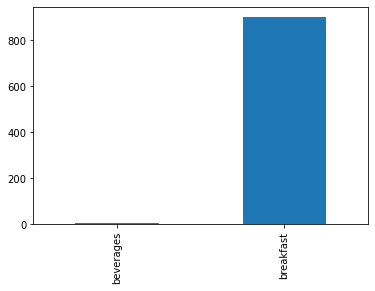

In [94]:
products_bar = orders_products_merged_customers['department'].value_counts().sort_index().plot.bar()

In [77]:
orders_products_merged_customers['days_since_prior_order'] = orders_products_merged_customers.groupby(['max_order'])['user_id'].transform(np.max)

In [78]:
orders_products_merged_customers.loc[orders_products_merged_customers['days_since_prior_order'] > 20, 'frequency_flag'] = 'Non-frequent customer'

In [79]:
orders_products_merged_customers.loc[(orders_products_merged_customers['days_since_prior_order'] <= 20) & (orders_products_merged_customers['days_since_prior_order'] > 10), 'frequency_flag'] = 'Regular customer'

In [80]:
orders_products_merged_customers.loc[(orders_products_merged_customers['days_since_prior_order'] <= 10) & (orders_products_merged_customers['days_since_prior_order'] > 10), 'frequency_flag'] = 'Frequent customer'

In [81]:
orders_products_merged_customers[['user_id', 'frequency_flag', 'max_order']].head(10)

,user_id,frequency_flag,max_order
0,516,Non-frequent customer,93
1,516,Non-frequent customer,93
2,516,Non-frequent customer,93
3,516,Non-frequent customer,93
4,516,Non-frequent customer,93
5,516,Non-frequent customer,93
6,516,Non-frequent customer,93
7,516,Non-frequent customer,93
8,516,Non-frequent customer,93
9,516,Non-frequent customer,93


In [82]:
orders_products_merged_customers['frequency_flag'].value_counts()

Non-frequent customer    907
Name: frequency_flag, dtype: int64

In [40]:
path = r'C:\Users\alexg\InstacartBasketAnalysis'

In [41]:
orders_products_merged_customers.to_pickle(os.path.join(path, '02Data','PreparedData', 'ords_prods_merge_2.pkl'))

In [42]:
orders_products_merged_customers.to_csv(os.path.join(path, '02Data','PreparedData', 'ords_prods_merge_2.csv'))

02. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

The information provided does not violate the personal identifiable information or PII. Clients’ personal information is not provided in data set. 

03. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [4]:
northeast = ['Maine', 'Vermont', 'New Hampshire', 'Massaschusetts', 'Rhonde Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [5]:
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [6]:
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [7]:
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [8]:
orders_products_merged_customers.loc[orders_products_merged_customers['state'].isin(northeast), 'region'] = 'northeast'

In [9]:
orders_products_merged_customers.loc[orders_products_merged_customers['state'].isin(midwest), 'region'] = 'midwest'

In [10]:
orders_products_merged_customers.loc[orders_products_merged_customers['state'].isin(south), 'region'] = 'south'

In [11]:
orders_products_merged_customers.loc[orders_products_merged_customers['state'].isin(West), 'region'] = 'West'

In [12]:
orders_products_merged_customers['region'].value_counts()

south        3318492
West         2577283
midwest      2308535
northeast    1370265
Name: region, dtype: int64

In [13]:
orders_products_merged_customers['max_order'] = orders_products_merged_customers.groupby(['user_id'])['order_number'].transform(np.max)

In [14]:
orders_products_merged_customers.loc[orders_products_merged_customers['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [15]:
orders_products_merged_customers.loc[(orders_products_merged_customers['max_order'] <= 40) & (orders_products_merged_customers['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [16]:
orders_products_merged_customers.loc[orders_products_merged_customers['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [17]:
orders_products_merged_customers['loyalty_flag'].value_counts()

Loyal customer      4596832
Regular customer    4561602
New customer         841566
Name: loyalty_flag, dtype: int64

In [25]:
orders_products_merged_customers = orders_products_merged_customers.astype({'prices':'int'})

In [26]:
orders_products_merged_customers = orders_products_merged_customers.astype({'user_id':'int'})

In [27]:
orders_products_merged_customers['prices'].dtype

dtype('int32')

In [28]:
orders_products_merged_customers['user_id'].dtype

dtype('int32')

In [54]:
orders_products_merged_customers.groupby('department_id').agg({'prices': ['mean', 'min', 'max']})

prices                
                        mean     min     max
department_id                               
1              205159.781765  192754  206208
2              205134.531049  192754  206208
3              205064.055142  192754  206208
4              205053.926317  192754  206208
5              205168.270192  192754  206208
6              205136.315919  192754  206208
7              205054.029933  192754  206208
8              205014.921965  192754  206208
9              205151.225644  192754  206208
10             204943.976097  192754  206208
11             205117.803599  192754  206208
12             205135.337377  192754  206208
13             205105.527695  192754  206208
14             205087.658309  192754  206208
15             205157.318576  192754  206208
16             205028.740465  192754  206208
17             205156.979662  192754  206208
18             204913.977311  192754  206208
19             205064.205514  192754  206208
20             205096.662575  192754  206208
21             205121.679546  192754  206208

In [56]:
orders_products_merged_customers['prices'] = orders_products_merged_customers.groupby(['max_order'])['user_id'].transform(np.max)

In [57]:
orders_products_merged_customers.loc[(orders_products_merged_customers['prices'] <= 206208 ) & (orders_products_merged_customers['prices'] > 200000), 'big_spender_flag'] = 'High spender'

In [58]:
orders_products_merged_customers.loc[orders_products_merged_customers['prices'] <= 200000, 'big_spender_flag'] = 'Low spender'

In [59]:
orders_products_merged_customers['big_spender_flag'].value_counts(dropna = False)

High spender    9727697
Low spender      272303
Name: big_spender_flag, dtype: int64

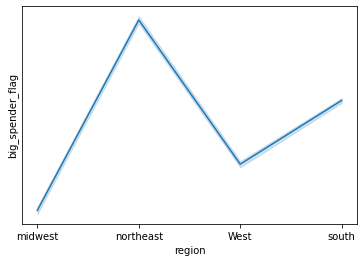

In [62]:
line_big_spender_flag_region = sns.lineplot(data = orders_products_merged_customers, x = 'region', y = 'big_spender_flag'  )

In [64]:
path = r'C:\Users\alexg\InstacartBasketAnalysis'

In [65]:
line_big_spender_flag_region.figure.savefig(os.path.join(path, '04Analysis','Visualizations', 'line_big_spender_flag_region.png'))

In [196]:
orders_products_merged_customers.to_csv(os.path.join(path, '02Data', 'PreparedData', 'orders_products_merged_customers.csv'))

In [197]:
orders_products_merged_customers.to_pickle(os.path.join(path, '02Data', 'PreparedData', 'orders_products_merged_customers.pkl'))

04. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [18]:
orders_products_merged_customers.loc[orders_products_merged_customers['max_order'] > 5, 'active_customers_flag'] = 'high-activity customers'

In [19]:
orders_products_merged_customers.loc[orders_products_merged_customers['max_order'] <= 5, 'active_customers_flag'] = 'low-activity customers'

In [20]:
orders_products_merged_customers['active_customers_flag'].value_counts(dropna = False)

high-activity customers    9774728
low-activity customers      225272
Name: active_customers_flag, dtype: int64

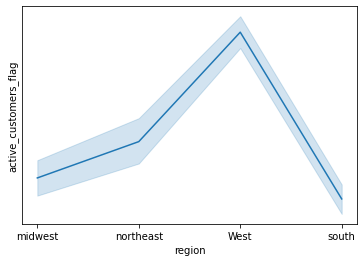

In [21]:
line_big_spender_flag_region = sns.lineplot(data = orders_products_merged_customers, x = 'region', y = 'active_customers_flag'  )

05. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “income” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)


# Creating age Group

In [96]:
orders_products_merged_customers.groupby('department_id').agg({'age': ['mean', 'min', 'max']})

age        
                    mean min max
department_id                   
1              20.777235   4  23
2              20.794414   4  23
3              20.747502   4  23
4              20.932339   4  23
5              20.012468   8  23
6              20.849391   7  23
7              20.606900   4  23
8              20.504376   7  23
9              20.873193   4  23
10             20.979762   9  23
11             20.749105   4  23
12             20.819245   4  23
13             20.805609   4  23
14             20.675258   4  23
15             20.801426   4  23
16             20.815665   4  23
17             20.699054   4  23
18             21.172895   7  23
19             20.592937   4  23
20             20.801803   4  23
21             20.794128  10  23

In [97]:
orders_products_merged_customers['age'] = orders_products_merged_customers.groupby(['income'])['order_hour_of_day'].transform(np.max)

In [98]:
orders_products_merged_customers.loc[orders_products_merged_customers['age'] <= 10, 'age_group_flag'] = 'Young Adult'

In [99]:
orders_products_merged_customers.loc[(orders_products_merged_customers['age'] > 10) & (orders_products_merged_customers['age'] < 20), 'age_group_flag'] = 'Adult'

In [100]:
orders_products_merged_customers.loc[orders_products_merged_customers['age'] > 20, 'age_group_flag'] = 'Senior'

In [101]:
orders_products_merged_customers['age_group_flag'].value_counts(dropna = False)

Senior         6399988
Adult          2454319
Young Adult    1145693
Name: age_group_flag, dtype: int64

# Creating income Group

In [102]:
orders_products_merged_customers.groupby('department_id').agg({'income': ['mean', 'min', 'max']})

income               
                        mean    min     max
department_id                              
1              101614.489428  25955  593901
2              100997.519340  25955  544248
3              102747.477745  25941  593901
4              101987.603168  25941  593901
5              113308.719087  26170  593901
6              102568.108518  25941  593901
7               98621.299157  25955  593901
8              107174.538530  26256  579169
9              103243.991403  25941  593901
10              95195.266428  27328  569253
11             101339.791238  25955  593901
12             104959.055961  26170  593901
13             102759.307092  25955  593901
14              99171.050934  25955  593901
15             103312.747124  25955  593901
16             101903.521466  25941  593901
17             103525.528334  25955  593901
18             102691.732359  26304  579169
19              94273.804906  25955  593901
20             101084.273323  25955  592409
21             100027.064693  26234  579169

In [127]:
orders_products_merged_customers.loc[orders_products_merged_customers['income'] <= 50000, 'income_flag'] = 'Low'

In [128]:
orders_products_merged_customers.loc[(orders_products_merged_customers['income'] > 50000) & (orders_products_merged_customers['income'] <= 100000 ), 'income_flag'] = 'Mid'

In [129]:
orders_products_merged_customers.loc[orders_products_merged_customers['income'] > 100000, 'income_flag'] = 'High'

In [130]:
orders_products_merged_customers['income_flag'].value_counts(dropna = False)

High    4683749
Mid     4412751
Low      903500
Name: income_flag, dtype: int64

In [107]:
orders_products_merged_customers.groupby('department_id').agg({'dependants': ['mean', 'min', 'max']})

dependants        
                    mean min max
department_id                   
1               1.515257   0   3
2               1.490930   0   3
3               1.496881   0   3
4               1.502334   0   3
5               1.504066   0   3
6               1.493325   0   3
7               1.509561   0   3
8               1.457445   0   3
9               1.510998   0   3
10              1.524777   0   3
11              1.514491   0   3
12              1.515712   0   3
13              1.504507   0   3
14              1.504891   0   3
15              1.515220   0   3
16              1.508444   0   3
17              1.516975   0   3
18              1.497203   0   3
19              1.509599   0   3
20              1.498503   0   3
21              1.514779   0   3

# Creating dependants Group

In [108]:
orders_products_merged_customers.loc[orders_products_merged_customers['dependants'] > 0, 'dependants_flag'] = 'no dependents'

In [109]:
orders_products_merged_customers.loc[(orders_products_merged_customers['dependants'] <= 1) & (orders_products_merged_customers['dependants'] < 3), 'dependants_flag'] = '1 to 2 dependents'

In [110]:
orders_products_merged_customers.loc[orders_products_merged_customers['dependants'] == 3, 'dependants_flag'] = '> 3 dependents'

In [111]:
orders_products_merged_customers['dependants_flag'].value_counts(dropna = False)

1 to 2 dependents    4943934
no dependents        2530609
> 3 dependents       2525457
Name: dependants_flag, dtype: int64

# Creating Meal Prepper Group

In [135]:
orders_products_merged_customers.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'Unnamed: 0', 'first_name', 'last_name',
       'gender', 'state', 'age', 'date_joined', 'dependants', 'marital_status',
       'income', 'region', 'max_order', 'loyalty_flag', 'big_spender_flag',
       'active_customers_flag', 'age_group_flag', 'income_flag',
       'dependants_flag'],
      dtype='object')

In [136]:
orders_products_merged_customers.loc[orders_products_merged_customers['orders_day_of_week'] <= 1, 'meal_prepper_flag'] = 'Meal'

In [138]:
orders_products_merged_customers.loc[orders_products_merged_customers['orders_day_of_week'] >= 2, 'meal_prepper_flag'] = 'Not'

In [140]:
orders_products_merged_customers['meal_prepper_flag'].value_counts(dropna = False)

Not     6340607
Meal    3659393
Name: meal_prepper_flag, dtype: int64

06. Create an appropriate visualization to show the distribution of profiles.

active_customers bar chart 

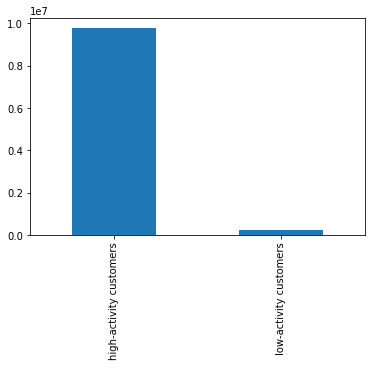

In [141]:
bar_active_customers_flag = orders_products_merged_customers['active_customers_flag'].value_counts().sort_index().plot.bar()

In [144]:
bar_active_customers_flag.figure.savefig(os.path.join(path, '04Analysis','Visualizations', 'bar_active_customers_flag.png'))

age_group bar chart 

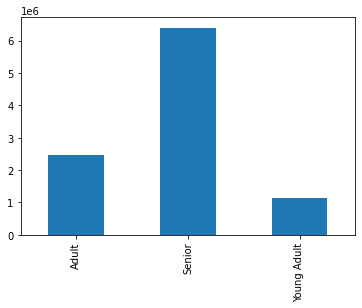

In [123]:
bar_age_group_flag = orders_products_merged_customers['age_group_flag'].value_counts().sort_index().plot.bar()

In [145]:
bar_age_group_flag.figure.savefig(os.path.join(path, '04Analysis','Visualizations', 'bar_age.png'))

income_flag bar chart 

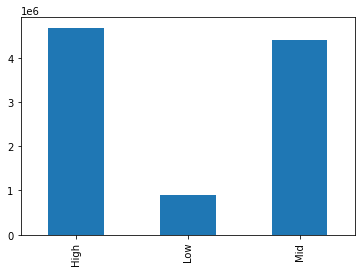

In [132]:
bar_income_flag = orders_products_merged_customers['income_flag'].value_counts().sort_index().plot.bar()

In [146]:
bar_income_flag.figure.savefig(os.path.join(path, '04Analysis','Visualizations', 'bar_income_flag.png'))

dependants_flag bar chart 

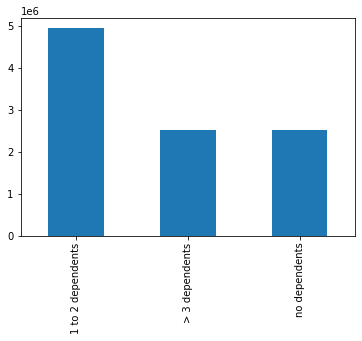

In [151]:
bar_dependants_flag = orders_products_merged_customers['dependants_flag'].value_counts().sort_index().plot.bar()

In [152]:
bar_dependants_flag.figure.savefig(os.path.join(path, '04Analysis','Visualizations', 'bar_dependants_flag.png'))

meal_prepper_flag bar chart 

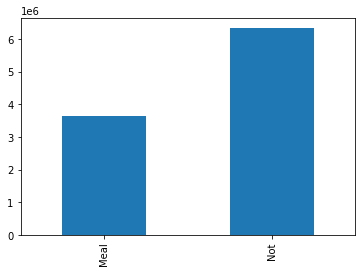

In [153]:
bar_meal_prepper_flag = orders_products_merged_customers['meal_prepper_flag'].value_counts().sort_index().plot.bar()

In [154]:
bar_meal_prepper_flag.figure.savefig(os.path.join(path, '04Analysis','Visualizations', 'bar_meal_prepper_flag.png'))

07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

age group flag usage frequency

In [157]:
orders_products_merged_customers.groupby('age_group_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
age_group_flag                                  
Adult                       11.565470  0.0  30.0
Senior                       8.747764  0.0  30.0
Young Adult                  9.884711  0.0  30.0

age group flag usage expenditure

In [158]:
orders_products_merged_customers.groupby('age_group_flag').agg({'prices': ['mean', 'min', 'max']})

prices                
                         mean     min     max
age_group_flag                               
Adult           205404.841867  192754  206208
Senior          204912.060284  192754  206208
Young Adult     205260.337205  192754  206208

Dependents group flag usage frequency

In [159]:
orders_products_merged_customers.groupby('dependants_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                    mean  min   max
dependants_flag                                    
1 to 2 dependents               9.551344  0.0  30.0
> 3 dependents                  9.583179  0.0  30.0
no dependents                   9.534021  0.0  30.0

Dependents  group flag usage expenditure

In [160]:
orders_products_merged_customers.groupby('dependants_flag').agg({'prices': ['mean', 'min', 'max']})

prices                
                            mean     min     max
dependants_flag                                 
1 to 2 dependents  205088.696079  192754  206208
> 3 dependents     205019.390181  192754  206208
no dependents      205095.466286  192754  206208

meal prepper group flag usage frequency

In [161]:
orders_products_merged_customers.groupby('meal_prepper_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                    mean  min   max
meal_prepper_flag                                  
Meal                            9.929863  0.0  30.0
Not                             9.339404  0.0  30.0

meal prepper group flag usage expenditure

In [162]:
orders_products_merged_customers.groupby('meal_prepper_flag').agg({'prices': ['mean', 'min', 'max']})

prices                
                            mean     min     max
meal_prepper_flag                               
Meal               205101.464150  192754  206208
Not                205056.424767  192754  206208

08. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

Crosstab age group and region

In [165]:
age_group_crosstab = pd.crosstab(orders_products_merged_customers['age_group_flag'], orders_products_merged_customers['region'], dropna = False)

In [166]:
age_group_crosstab

region,West,midwest,northeast,south
age_group_flag,,,,
Adult,634194,550590,340695,827714
Senior,1643086,1491905,875227,2125188
Young Adult,300003,266040,154343,365590


Crosstab income group and region

In [167]:
income_group_crosstab = pd.crosstab(orders_products_merged_customers['income_flag'], orders_products_merged_customers['region'], dropna = False)

In [168]:
income_group_crosstab

region,West,midwest,northeast,south
income_flag,,,,
High,1213566,1130775,624059,1514270
Low,217321,200948,124578,319622
Mid,1146396,976812,621628,1484600


Crosstab dependents group and region

In [173]:
dependants_group_crosstab = pd.crosstab(orders_products_merged_customers['dependants_flag'], orders_products_merged_customers['region'], dropna = False)

In [174]:
dependants_group_crosstab

region,West,midwest,northeast,south
dependants_flag,,,,
1 to 2 dependents,1275292,1169090,663247,1609583
> 3 dependents,641908,569408,351528,862478
no dependents,660083,570037,355490,846431


Crosstab meal prepper group and region

In [172]:
meal_prepper_flag_group_crosstab = pd.crosstab(orders_products_merged_customers['meal_prepper_flag'], orders_products_merged_customers['region'], dropna = False)

In [175]:
meal_prepper_flag_group_crosstab

region,West,midwest,northeast,south
meal_prepper_flag,,,,
Meal,946590,840110,502137,1211411
Not,1630693,1468425,868128,2107081


09. Produce suitable charts to illustrate your results and export them in your project folder.

creating tab to display age_region

In [176]:
age_region_bar = pd.crosstab(orders_products_merged_customers['region'], columns = orders_products_merged_customers['age_group_flag'])

In [179]:
age_region_bar

age_group_flag,Adult,Senior,Young Adult
region,,,
West,634194,1643086,300003
midwest,550590,1491905,266040
northeast,340695,875227,154343
south,827714,2125188,365590


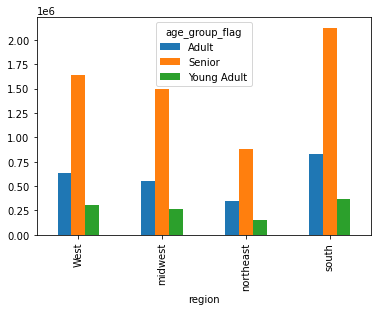

In [182]:
age_region_bar = age_region_bar.plot.bar()

In [192]:
age_region_bar.figure.savefig(os.path.join(path, '04Analysis','Visualizations', 'age_region_bar.png'))

creating tab to display income_region

In [183]:
income_region_bar = pd.crosstab(orders_products_merged_customers['region'], columns = orders_products_merged_customers['income_flag'])

In [184]:
income_region_bar

income_flag,High,Low,Mid
region,,,
West,1213566,217321,1146396
midwest,1130775,200948,976812
northeast,624059,124578,621628
south,1514270,319622,1484600


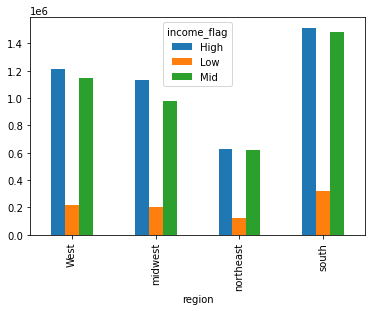

In [185]:
income_region_bar = income_region_bar.plot.bar()

In [193]:
income_region_bar.figure.savefig(os.path.join(path, '04Analysis','Visualizations', 'income_region_bar.png'))

creating tab to display dependents_region

In [186]:
dependants_region_bar = pd.crosstab(orders_products_merged_customers['region'], columns = orders_products_merged_customers['dependants_flag'])

In [187]:
dependants_region_bar

dependants_flag,1 to 2 dependents,> 3 dependents,no dependents
region,,,
West,1275292,641908,660083
midwest,1169090,569408,570037
northeast,663247,351528,355490
south,1609583,862478,846431


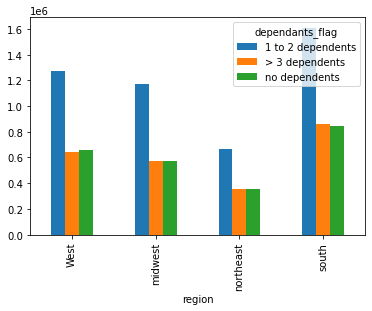

In [188]:
dependants_region_bar = dependants_region_bar.plot.bar()

In [194]:
dependants_region_bar.figure.savefig(os.path.join(path, '04Analysis','Visualizations', 'dependants_region_bar.png'))

creating tab to display meal_prepper_region

In [189]:
meal_prepper_region_bar = pd.crosstab(orders_products_merged_customers['region'], columns = orders_products_merged_customers['meal_prepper_flag'])

In [190]:
meal_prepper_region_bar

meal_prepper_flag,Meal,Not
region,,
West,946590,1630693
midwest,840110,1468425
northeast,502137,868128
south,1211411,2107081


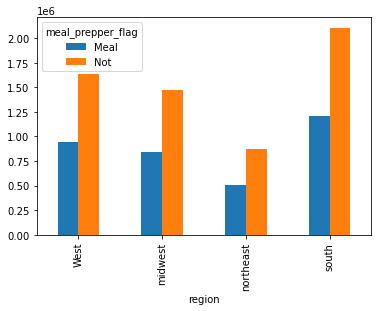

In [191]:
meal_prepper_region_bar = meal_prepper_region_bar.plot.bar()

In [195]:
meal_prepper_region_bar.figure.savefig(os.path.join(path, '04Analysis','Visualizations', 'meal_prepper_region_bar.png'))